# Ferreira et.al. 2018
Following is its notation and description

|      Parameter       | description                                                  |
| :------------------: | :----------------------------------------------------------- |
|         $K$          | Total number of available price vectors                      |
|         $N$          | Total number of products                                    |
|         $M$          | Total number of kinds of resource                            |
|         $T$          | Total number of periods                                      |
|        $[x]$         | We define $[x]$ as a set, $[x]=\{1,2,\cdots, x\}$            |
|         $i$          | Index of products                                            |
|         $j$          | Index of resources                                           |
|         $t$          | Index of period                                              |
|     $I_j,I_j(t)$     | $I_j$ is the initial inventory for each resource $j\in [M]$, $I_j(t)$ is the inventory at the end of period $t$. $I_j(0)=I_j$ |
|       $a_{ij}$       | When we produced one unit item $i$, it would consume $a_{ij}$ unit $j$ |
|        $c_j$         | we define $c_j=\frac{I_j}{t}$                                |
|        $p_k$         | We define $\{p_1,p_2,\cdots,p_K\}$ as the admissible price vectors, each $p_k$ is a $N\times 1$ vector, specifying the price of each product, $p_k=(p_{1k},\cdots,p_{Nk})$, where $p_{ik}$ is the price of product $i$, for $i\in [N]$. We define $p_{\infty}$ as a "shut-off" price, such that the demand for any product under this price is zero. |
|        $P(t)$        | We denote by $P(t)=(P_1(t),\cdots,P_N(t))$ the prices chosen by the retailer in this period, and require that $P(t)\in \{p_1,p_2,\cdots,p_K,p_{\infty}\}$ |
|        $D(t)$        | We denote by $D(t) = (D_1(t),\cdots,D_N(t))$ the demand of each product at period $t$. We assume that given $P(t)=p_k$, the demand $D(t)$ is sampled from a probability distribution on $\mathbb{R}^{N}_+$ with joint cumulative distribution function (CDF) $F (x_1,\cdots,x_N, pk, \theta )$. $D(t)$ is independent of the history $\mathcal{H}_{t-1}$, given $P(t)$ |
|       $\theta$       | $\theta$ is the parameter of demand distribution, takes values in the parameter space $\Theta\subset\mathbb{R}^l$. The nature would sample $\theta$ from a prior distribution at the beginning form the process. The distribution is assumed to be subexponential; |
|  $\mathcal{H}_{t }$  | $\mathcal{H}_{t}=(P(1),D(1),\cdots,P(t),D(t))$               |
|       $\xi(t)$       | At the beginning of each period $t\in[T]$, the retailer observes some context $\xi(t)$, $\xi(t)$ belongs to some discrete set $\mathcal{X}$. We assume $\xi(t)$ is sampled i.i.d from a known distribution. |
 | $d_{ik}(\xi|\theta)$ | The mean demand of product $i\in [N]$ under price vector $p_k$, $\forall k\in[K]$, given context $\xi$ and parameter $\theta$ |


## 1 st algorithm

We implement the 4th algorithm of Ferreira et.al. 2018

<img src="./Figure/Algorithem_1_of_Ferreira_et_al_2018.png" style="zoom:80%" />

The most challenging part of implementing this algorithm is how to sample $\theta$ from the posterior distribution. Here we assume the prior distribution of theta is Uniform(0, 1), and the demand follows Bernoulli Distribution. Then we can implement the algorithm with following two ways

1. Derive the explicit distribution of posterior distribution <br>
    For each $k\in [K], i\in [N]$, the poseterior density function of $\Theta_{k,i}$ is 
    $$
    \begin{align}
    f(\theta_{k,i} | (p^{(t_1)}_{k},d^{(t_1)}_k),\cdots, (p^{(t_\tau)}_{k},d^{(t_\tau)}_k)) 
    & = \frac{Pr(d^{(t_1)}_k,\cdots, ,d^{(t_\tau)}_k \ | \ \theta_{k,i}) * 1}{\int_{0}^{1}Pr(d^{(t_1)}_k,\cdots, ,d^{(t_\tau)}_k \ | \ \theta)*1d\theta}\\
    &=\frac{\prod_{j=1}^\tau Pr(d^{(t_j)}_k| \ \theta_{k,i}) * 1}{\int_{0}^{1}\prod_{j=1}^\tau Pr(d^{(t_j)}_k| \ \theta)*1d\theta}\\
    &=\frac{\theta_{k,i}^{\sum_{j=1}^\tau d^{(t_j)}_k} (1-\theta_{k,i})^{\tau-\sum_{j=1}^\tau d^{(t_j)}_k}}{\int_{0}^{1}\theta^{\sum_{j=1}^\tau d^{(t_j)}_k} (1-\theta)^{\tau-\sum_{j=1}^\tau d^{(t_j)}_k}d\theta}\\
    &=beta(\sum_{j=1}^\tau d^{(t_j)}_k, \tau-\sum_{j=1}^\tau d^{(t_j)}_k)
    \end{align}
    $$<br>
    Reminds $d^{(i)}_j$ is the demand of $j^{th}$ product in $i^{th}$ period<br>
    Thus we can sample $\theta$ from existing python packages(numpy, scipy.stat) which implement the Beta Distribution.<br>
    <br>
    Similarly, the convenience will occur if we assume the theta follows normal while the demand following normal. We can also assume the theta follows exponential distribution while the demand following Poisson. In this case, the posterior of $\theta$ is Gamma distribution. <br>
    
    **But this is not a general solution.** The posterior distribution might not always show up as an well known distribution with existing pacakges to sample from it.
    
    
    
2. Use Metropolitan-Hastings Algorithm to sample value
    The details of Metropolitan-Hastings Algorithm can be found in Sawyer_The Metropolitan-Hastings Algorithm and Extensions.pdf<br>
    Metropolitan-Hastings Algorithm allows us to sample random variables from a distribution whose prob density function is $c g(x)$.<br> 
    If we can calculate the exact value of $g(x)$, we can conduct this algorithm without knowing $c$. <br>
    
    In our setting, $c$ can be seen as the denominator of the Bayesian Formula, which often shows up as an untractable integral, while $g(x)$ is the nominator which often has the explicit formula.<br>
    The weakness of this algorithm is it might be time-consuming due to its "warm up" phase. This problem might become more serious when the dimension of $\theta$ increase.
    
    
Following is my demo showing how to use my implementation of above two algorithms to conduct numeric experiments.

In [1]:
%reset -f
import numpy as np
import pandas as pd
import datetime
from tqdm import tqdm
from Source.agent import ThompsonAgent_Fixed_Beta, ThompsonAgent_Fixed_MH, UniformAgent
from Source.env import Environment_Bernoulli

In [2]:
# Generate parameters
np.random.seed(12345)

# the maximum value of np.random.randint(low, high) would be high - 1
# K = np.random.randint(low = 2, high = 10) # Total number of available price vectors, 
# N = np.random.randint(low = 2, high = 10) # Total number of products
# M = np.random.randint(low = 2, high = 10) # Total number of kinds of resource
# T = 1000 # Total number of periods
K = 4 # Total number of available price vectors, 
N = 1 # Total number of products
M = 2 # Total number of resource
T = 1000 # Total number of periods

# each row represent an admissible pricing strategy
P_list = np.float64(np.random.randint(low = 1, high = 10, size = (K, N)))

# initialize inventory
# c is the limitation of resources in each round
c = np.random.randint(low = 10, high = 15, size = M)
I_0 = c * T

# initialize a_ij
# A is the cost of each product
A = np.float64(np.random.randint(low = 10, high = 15, size = (N,M)))

# initialize real parameter theta
theta = np.random.beta(a = 2, b = 1, size = (K,N))

In [3]:
# conduct experiments
import time

exp_num = 5

reward_thompson_fixed = np.zeros(shape = (exp_num, T))
reward_thompson_MH = np.zeros(shape = (exp_num, T))
rewarduniform = np.zeros(shape = (exp_num, T))

for exp_index in range(exp_num):
    agent = ThompsonAgent_Fixed_Beta(K, N, M, T, P_list, A, I_0, random_seed=exp_index)
    env = Environment_Bernoulli(theta, K, N, random_seed=exp_index)
    for t in tqdm(range(1, T+1)):
        price_offered_index = agent.action()
        demand = env.response(price_offered_index)
        agent.update(demand)
    reward_thompson_fixed[exp_index, :] = agent.H_reward
    
    agent = ThompsonAgent_Fixed_MH(K, N, M, T, P_list, A, I_0, random_seed=exp_index, MH_N=1000)
    env = Environment_Bernoulli(theta, K, N, random_seed=exp_index)
    for t in tqdm(range(1, T+1)):
        price_offered_index = agent.action()
        demand = env.response(price_offered_index)
        agent.update(demand)
    reward_thompson_MH[exp_index, :] = agent.H_reward
        
    agent = UniformAgent(K, N, M, T, P_list, A, I_0, random_seed=exp_index)
    env = Environment_Bernoulli(theta, K, N, random_seed=exp_index)
    for t in tqdm(range(1, T+1)):
        price_offered_index = agent.action()
        demand = env.response(price_offered_index)
        agent.update(demand)
    rewarduniform[exp_index, :] = agent.H_reward
    
    print(f"experiment {exp_index} done")
    time.sleep(1) # pause the programme to output information

reward_thompson_fixed = np.mean(reward_thompson_fixed, axis = 0)
reward_thompson_MH = np.mean(reward_thompson_MH, axis = 0)
rewarduniform = np.mean(rewarduniform, axis = 0)

 20%|███████████████▍                                                               | 195/1000 [02:25<10:06,  1.33it/s]E:\工作事务\个人工作\学术研究\Online-Learning-Implementation\Ferrira-et-al-2018-Thompson_Sampling\Source\agent.py:367: RuntimeWarning: overflow encountered in power
  density *= np.prod(x ** self.H_alpha[self.t - 1, kk, :]) * np.prod((1.0 - x) ** self.H_beta[self.t - 1, kk, :])
E:\工作事务\个人工作\学术研究\Online-Learning-Implementation\Ferrira-et-al-2018-Thompson_Sampling\Source\agent.py:367: RuntimeWarning: invalid value encountered in double_scalars
  density *= np.prod(x ** self.H_alpha[self.t - 1, kk, :]) * np.prod((1.0 - x) ** self.H_beta[self.t - 1, kk, :])
E:\工作事务\个人工作\学术研究\Online-Learning-Implementation\Ferrira-et-al-2018-Thompson_Sampling\Source\agent.py:367: RuntimeWarning: overflow encountered in double_scalars
  density *= np.prod(x ** self.H_alpha[self.t - 1, kk, :]) * np.prod((1.0 - x) ** self.H_beta[self.t - 1, kk, :])
100%|████████████████████████████████████████████████████

experiment 0 done


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 11521.52it/s]


experiment 1 done


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 12374.59it/s]


experiment 2 done


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 12223.87it/s]


experiment 3 done


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 12690.78it/s]


experiment 4 done


In [4]:
# calculate the benchmark
from scipy.optimize import linprog

# generate coefficient of object function
obj_c = -np.sum(P_list * theta, axis=1)

# generate coefficient matrix of the constraints
Aub = np.zeros((M + 1, K))
Aub[: M, :] = (theta @ A).T  # demand @ self.A is a K*M matrix, each row represents the consumption of each resource
Aub[M, :] = np.ones(K)
bub = np.zeros(M + 1)
bub[: M] = c
bub[M] = 1

# solve the problem
result = linprog(c=obj_c, A_ub=Aub, b_ub=bub)

# unzip the result
Opt = -result.fun

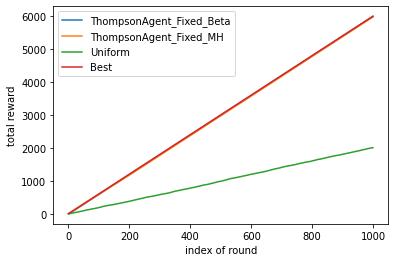

In [15]:
# plot the cumulative reward
import matplotlib.pyplot as plt

bestreward = Opt * np.ones(T)
plt.figure()
index = np.arange(1, T)

plt.plot(index, np.cumsum(reward_thompson_fixed)[index], label="ThompsonAgent_Fixed_Beta")
plt.plot(index, np.cumsum(reward_thompson_MH)[index], label="ThompsonAgent_Fixed_MH")
plt.plot(index, np.cumsum(rewarduniform)[index], label="Uniform")
plt.plot(index, np.cumsum(bestreward)[index], label="Best")
plt.xlabel("index of round")
plt.ylabel("total reward")
plt.legend()
plt.show()

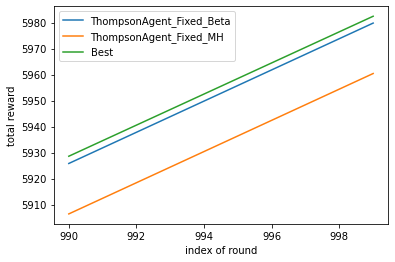

In [18]:
# plot the cumulative reward
import matplotlib.pyplot as plt

bestreward = Opt * np.ones(T)
plt.figure()
index = np.arange(T-10, T)

plt.plot(index, np.cumsum(reward_thompson_fixed)[index], label="ThompsonAgent_Fixed_Beta")
plt.plot(index, np.cumsum(reward_thompson_MH)[index], label="ThompsonAgent_Fixed_MH")
# plt.plot(index, np.cumsum(rewarduniform)[index], label="Uniform")
plt.plot(index, np.cumsum(bestreward)[index], label="Best")
plt.xlabel("index of round")
plt.ylabel("total reward")
plt.legend()
plt.show()

## 2 nd algorithm

We implement the 4th algorithm of Ferreira et.al. 2018

<img src="./Figure/Algorithem_2_of_Ferreira_et_al_2018.png" style="zoom:80%" />

$c_j(t) = \frac{I_j(t-1)}{T-t+1}$

In [1]:
# import packages
%reset -f
import numpy as np
import pandas as pd
import datetime
from tqdm import tqdm
from Source.agent import ThompsonAgent_Update_Beta, ThompsonAgent_Update_MH, UniformAgent
from Source.env import Environment_Bernoulli

In [2]:
# Generate parameters
np.random.seed(12345)

# the maximum value of np.random.randint(low, high) would be high - 1
K = 4 # Total number of available price vectors, 
N = 1 # Total number of products
M = 2 # Total number of resource
T = 1000 # Total number of periods

# each row represent an admissible pricing strategy
P_list = np.float64(np.random.randint(low = 1, high = 10, size = (K, N)))

# initialize inventory
# c is the limitation of resources in each round
c = np.random.randint(low = 10, high = 15, size = M)
I_0 = c * T

# initialize a_ij
# A is the cost of each product
A = np.float64(np.random.randint(low = 10, high = 15, size = (N,M)))

# initialize real parameter theta
theta = np.random.beta(a = 2, b = 1, size = (K,N))

In [3]:
# conduct experiments
import time

exp_num = 5

reward_thompson_fixed = np.zeros(shape = (exp_num, T))
reward_thompson_MH = np.zeros(shape = (exp_num, T))
rewarduniform = np.zeros(shape = (exp_num, T))

for exp_index in range(exp_num):
    agent = ThompsonAgent_Update_Beta(K, N, M, T, P_list, A, I_0, random_seed=exp_index)
    env = Environment_Bernoulli(theta, K, N, random_seed=exp_index)
    for t in tqdm(range(1, T+1)):
        price_offered_index = agent.action()
        demand = env.response(price_offered_index)
        agent.update(demand)
    reward_thompson_fixed[exp_index, :] = agent.H_reward
    
    agent = ThompsonAgent_Update_MH(K, N, M, T, P_list, A, I_0, random_seed=exp_index, MH_N=1000)
    env = Environment_Bernoulli(theta, K, N, random_seed=exp_index)
    for t in tqdm(range(1, T+1)):
        price_offered_index = agent.action()
        demand = env.response(price_offered_index)
        agent.update(demand)
    reward_thompson_MH[exp_index, :] = agent.H_reward
        
    agent = UniformAgent(K, N, M, T, P_list, A, I_0, random_seed=exp_index)
    env = Environment_Bernoulli(theta, K, N, random_seed=exp_index)
    for t in tqdm(range(1, T+1)):
        price_offered_index = agent.action()
        demand = env.response(price_offered_index)
        agent.update(demand)
    rewarduniform[exp_index, :] = agent.H_reward
    
    print(f"experiment {exp_index} done")
    time.sleep(1) # pause the programme to output information

reward_thompson_fixed = np.mean(reward_thompson_fixed, axis = 0)
reward_thompson_MH = np.mean(reward_thompson_MH, axis = 0)
rewarduniform = np.mean(rewarduniform, axis = 0)

 20%|███████████████▍                                                               | 195/1000 [02:25<10:06,  1.33it/s]E:\工作事务\个人工作\学术研究\Online-Learning-Implementation\Ferrira-et-al-2018-Thompson_Sampling\Source\agent.py:788: RuntimeWarning: overflow encountered in power
  density *= np.prod(x ** self.H_alpha[self.t - 1, kk, :]) * np.prod((1.0 - x) ** self.H_beta[self.t - 1, kk, :])
E:\工作事务\个人工作\学术研究\Online-Learning-Implementation\Ferrira-et-al-2018-Thompson_Sampling\Source\agent.py:788: RuntimeWarning: invalid value encountered in double_scalars
  density *= np.prod(x ** self.H_alpha[self.t - 1, kk, :]) * np.prod((1.0 - x) ** self.H_beta[self.t - 1, kk, :])
E:\工作事务\个人工作\学术研究\Online-Learning-Implementation\Ferrira-et-al-2018-Thompson_Sampling\Source\agent.py:788: RuntimeWarning: overflow encountered in double_scalars
  density *= np.prod(x ** self.H_alpha[self.t - 1, kk, :]) * np.prod((1.0 - x) ** self.H_beta[self.t - 1, kk, :])
100%|████████████████████████████████████████████████████

experiment 0 done


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 11800.12it/s]


experiment 1 done


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 11521.55it/s]


experiment 2 done


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3580.99it/s]


experiment 3 done


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 12532.24it/s]


experiment 4 done


In [4]:
# calculate the benchmark
from scipy.optimize import linprog

# generate coefficient of object function
obj_c = -np.sum(P_list * theta, axis=1)

# generate coefficient matrix of the constraints
Aub = np.zeros((M + 1, K))
Aub[: M, :] = (theta @ A).T  # demand @ self.A is a K*M matrix, each row represents the consumption of each resource
Aub[M, :] = np.ones(K)
bub = np.zeros(M + 1)
bub[: M] = c
bub[M] = 1

# solve the problem
result = linprog(c=obj_c, A_ub=Aub, b_ub=bub)

# unzip the result
Opt = -result.fun

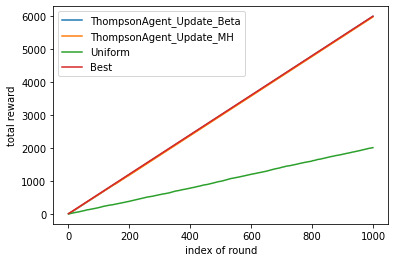

In [5]:
# plot the cumulative reward
import matplotlib.pyplot as plt

bestreward = Opt * np.ones(T)
plt.figure()
index = np.arange(1, T)

plt.plot(index, np.cumsum(reward_thompson_fixed)[index], label="ThompsonAgent_Update_Beta")
plt.plot(index, np.cumsum(reward_thompson_MH)[index], label="ThompsonAgent_Update_MH")
plt.plot(index, np.cumsum(rewarduniform)[index], label="Uniform")
plt.plot(index, np.cumsum(bestreward)[index], label="Best")
plt.xlabel("index of round")
plt.ylabel("total reward")
plt.legend()
plt.show()

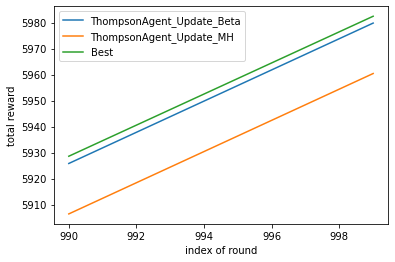

In [6]:
# plot the cumulative reward
import matplotlib.pyplot as plt

bestreward = Opt * np.ones(T)
plt.figure()
index = np.arange(T-10, T)

plt.plot(index, np.cumsum(reward_thompson_fixed)[index], label="ThompsonAgent_Update_Beta")
plt.plot(index, np.cumsum(reward_thompson_MH)[index], label="ThompsonAgent_Update_MH")
# plt.plot(index, np.cumsum(rewarduniform)[index], label="Uniform")
plt.plot(index, np.cumsum(bestreward)[index], label="Best")
plt.xlabel("index of round")
plt.ylabel("total reward")
plt.legend()
plt.show()